# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020","ALQ110"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [3]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Tue, 30 Jun 2020   Prob (F-statistic):             0.0991
Time:                        14:21:17   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Older people have a higher BMI than younger people, though the slope is quite shallow.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

There is no statistically significant relationship between BMI and age.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

The additional 20 years of age would represent an increase of 0.182 in BMI.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

0.1% of the variation if explained by age.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [80]:
# Create Variables
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mex Am", 2: "Oth Hisp", 3: "Non Hisp White", 4: "Other", 5: np.nan})

In [36]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da.dropna())
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     17.34
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           4.92e-17
Time:                        18:04:54   Log-Likelihood:                -14542.
No. Observations:                4331   AIC:                         2.910e+04
Df Residuals:                    4325   BIC:                         2.913e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      31.3297      0.380     82.418      0.000      30.584      32.075
RIAGENDRx[T.Male]              -1.2365      0.212     -5.836      0.000      -1.652      -0.821
RIDRETH1x[T.Non Hisp White]    -1.8466      0.289     -6.396      0.000      -2.413      -1.281
RIDRETH1x[T.Oth Hisp]          -0.9425      0.353     -2.669      0.008      -1.635      -0.250
RIDRETH1x[T.Other]             -0.4490      0.316     -1.422      0.155      -1.068       0.170
RIDAGEYR                        0.0066      0.006      1.106      0.269      -0.005       0.018
==============================================================================
Omnibus:                      715.440   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1338.820
Skew:                           1.028   Prob(JB):                    1.90e-291
Kurtosis:                       4.786   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

Age now has an even weaker parameter and even less statistical significance.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

It did not change.

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

The new R squared (Adjusted) is 0.019 in comparison to the previous 0.001. The additional variation explained by the other variables is 0.018.

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican Americans

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

Age adds 0.0066 for every year and all other factors are being held constant. Therefore, the 40 year old's BMI is expected to be 0.066 more than the 30 year old's BMI.

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In this example, both gender and ethnicity are different. Mexican American woman is the default in our model. Being a man decreases BMI by -1.12365. Being a non-Hispanic black person decreases BMI by -0.4490. Together the non-Hispanic black man is expected to have a BMI that is 1.52765 less than the Mexican-American woman.

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [21]:
da['row'] = da.index
type(da['row'])

pandas.core.series.Series

In [26]:
# Size = 25% of the population
sampSize = int(round(len(da) * .25,0))

# Select random
sample_rows = np.random.choice(da['row'], sampSize)

In [34]:
# Draw sample
sample = da.loc[sample_rows,:]

0.2500980007840063

In [35]:
# Fit Q2 model
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=sample)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.978
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.83e-05
Time:                        17:56:10   Log-Likelihood:                -3627.9
No. Observations:                1080   AIC:                             7268.
Df Residuals:                    1074   BIC:                             7298.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      30.9441      0.778     39.777      0.000      29.418      32.471
RIAGENDRx[T.Male]              -1.5896      0.427     -3.723      0.000      -2.428      -0.752
RIDRETH1x[T.Non Hisp White]    -1.8335      0.587     -3.123      0.002      -2.986      -0.682
RIDRETH1x[T.Oth Hisp]          -1.4491      0.688     -2.107      0.035      -2.798      -0.100
RIDRETH1x[T.Other]             -0.3342      0.637     -0.525      0.600      -1.584       0.916
RIDAGEYR                        0.0205      0.012      1.683      0.093      -0.003       0.044
==============================================================================
Omnibus:                      166.992   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.396
Skew:                           0.952   Prob(JB):                     2.17e-66
Kurtosis:                       4.758   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

In the sample model, standard errors are higher than the original. This is an expected result considering the smaller size of the data set. 

The coefficients are roughly the same as the entire population, but are less precise estimates as reflected by the higher standard error and lower t-statistics and higher p-values.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

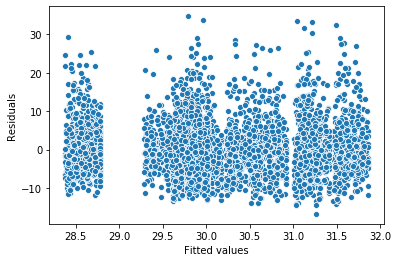

In [37]:
pp = sns.scatterplot(result2.fittedvalues, result2.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")


__Q4a.__ What mean/variance relationship do you see?

There doesn't appear to be a strong relationship. The higher mean values appear to have slightly more positive variance than the very low mean values.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

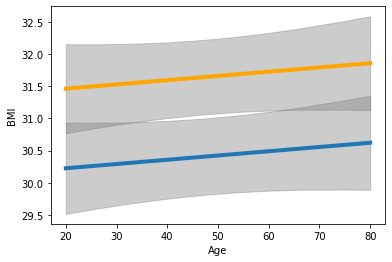

In [75]:
from statsmodels.sandbox.predict_functional import predict_functional

# Set Defaults (here want to look at Mexican American Men)
values = {"RIAGENDRx": "Male", "RIAGENDR": 1, "DMDEDUC2": 1, 
          "RIDRETH1": 1, "SMQ020": 1, 'row': 1, 'index': 1,
         "RIDRETH1x": "Mex Am", "BPXSY1":1 }

pr, cb, fv = predict_functional(result2, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

# Add Mexican American Woman
values2 = {"RIAGENDRx": "Female", "RIAGENDR": 1, "DMDEDUC2": 1, 
          "RIDRETH1": 1, "SMQ020": 1, 'row': 1, 'index': 1,
         "RIDRETH1x": "Mex Am", "BPXSY1":1 }

pr2, cb2, fv2 = predict_functional(result2, "RIDAGEYR",
                values=values2, ci_method="simultaneous")

ax = sns.lineplot(fv2, pr2, lw=4, color = 'orange')
ax.fill_between(fv2, cb2[:, 0], cb2[:, 1], color='grey', alpha=0.4)

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

Th mean BMI could be constant from 20-80 with a line drawn a the fitted mean for a 30 year old. The confidence intervals are wide in this model.

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

These intervals do not overlap between 35-60 years.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

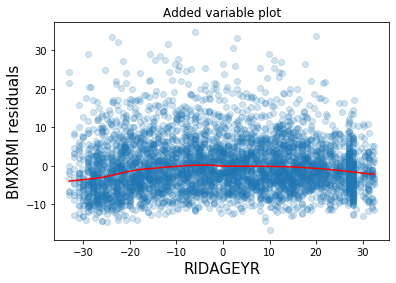

In [76]:
# Import
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

This chart allows us to investigate whether the relationship between age and BMI is linear, controlling for gender and ethnicity. In fact, the red line appears to be slightly quadratic, but generally flat across all ages. This supports the theory that the relationship between age and BMI is potentially nonlinear.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [91]:
da["drink"] = da.ALQ110.replace({2: 0, 7: np.nan, 9: np.nan})
da = da.dropna()

In [92]:
c = pd.crosstab(da.RIAGENDRx, da.drink).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c["log_odds"] = np.log(c.odds)
c

drink,0.0,1.0,odds,log_odds
RIAGENDRx,,,,
Female,0.530850,0.469150,0.883772,-0.123556
Male,0.546012,0.453988,0.831461,-0.184571


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

A log odds of 0 represents 50%.

The fact that the log odds for females is negative reflects that less than 50% of females have had at least 12 drinks in their lifetime. 

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

There appears to be a small difference between the two groups.

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [93]:
model = sm.GLM.from_formula("drink ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  drink   No. Observations:                 1185
Model:                            GLM   Df Residuals:                     1183
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -818.36
Date:                Tue, 30 Jun 2020   Deviance:                       1636.7
Time:                        18:49:48   Pearson chi2:                 1.18e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1236      0.068     -1.807      0.071      -0.258       0.010
RIAGENDRx[T.Male]    -0.0610      0.131     -0.467      0.640      -0.317       0.195
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

There is no statistically significant difference between the two groups. 

__Q8b.__ Confirm that the log odds ratio between drinking and gender calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [96]:
c.log_odds.Male - c.log_odds.Female ## matches the parameter coefficient

-0.06101502896026696

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [97]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

In [104]:
model = sm.GLM.from_formula("drink ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=da)
result_log = model.fit()
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  drink   No. Observations:                 1185
Model:                            GLM   Df Residuals:                     1177
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -795.61
Date:                Wed, 01 Jul 2020   Deviance:                       1591.2
Time:                        16:05:15   Pearson chi2:                 1.18e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.7846      0.245     -3.205      0.001      -1.264      -0.305
RIAGENDRx[T.Male]               -0.0953      0.133     -0.715      0.475      -0.357       0.166
DMDEDUC2x[T.<9]                 -0.4752      0.215     -2.210      0.027      -0.897      -0.054
DMDEDUC2x[T.College]             0.4609      0.218      2.119      0.034       0.035       0.887
DMDEDUC2x[T.Don't know]        -20.3738   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
DMDEDUC2x[T.HS/GED]              0.3755      0.205      1.834      0.067      -0.026       0.777
DMDEDUC2x[T.Some college/AA]     0.5682      0.196      2.906      0.004       0.185       0.951
RIDAGEYR                         0.0082      0.003      2.469      0.014       0.002       0.015
================================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

The dummy variable for "Some College" and age.

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

(Who are we comparing to in terms of age?)

The default is a Female with 9-11 years of schooling. A college educated woman, by comparison, has log odds that are 0.4609 units greater than the default. With every year of age, the log odds of being a drinker increase by 0.0082. As calculated below, the odds of this woman drinking are 2.4 higher than the default person (of age zero). 

In [101]:
np.exp(0.4609 + 0.0082*50)

2.3890600402814193

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [103]:
# College
print("College ", np.exp(0.4609))

# HS
print("HS ", np.exp(0.3755))

College  1.585500293323449
HS  1.4557190922297534


A college graduate is 1.6 times more likely to be a drinker than a person who finished between 9-11 years of schooling. A high school graduate is 1.45 times more likely to be a drinker in comparison to that reference person.

Using those odds, we can calculate that a college graduate is 1.1 times more likely to be a drinker than a high school graduate.

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

With age and education added, the gender parameter coefficient is estimated to be -0.0953 and not statistically significant. When the model was run with gender as the only variable, the estimated coefficient was -0.0610 and even less significant.

The coefficient of the gender parameter grew more negative, implying a greater impact of gender, but without statistical signficance, this value does not tell us much. 

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

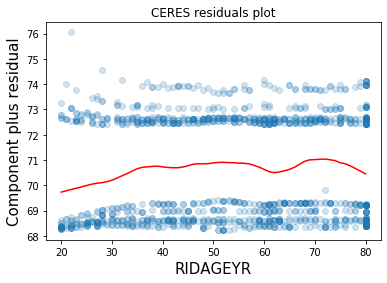

In [105]:
fig = result_log.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

This plot is useful for identifying any curvature in the mean relationship between the outcome (drinking) and one of the covariates (age). 

The red line suggests that drinking rates may be rising faster between 20-40 (particularly, 30-40) and level off between 40-60 before dipping between 60-70 and finally rising and then dipping again between 70-80. This contradicts the perfectly linear model we specified.